https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

from category_encoders import TargetEncoder, OneHotEncoder


pd.set_option('display.max_columns', 10000)


LotArea - размер участка в футах

In [2]:
train = pd.read_csv(r'../data/regression/house_price/train.csv')
test = train.sample(200, random_state=123)

In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
147,148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,884,1151,0,2035,0,0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2001.0,Fin,2,434,TA,TA,Y,144,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,2,1900,1950,Gable,CompShg,AsbShng,Stucco,NaN,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,1095,1095,GasW,Fa,N,SBrkr,1095,679,0,1774,1,0,2,0,4,2,TA,8,Min2,0,NaN,2Types,1920.0,Unf,3,779,Fa,Fa,N,0,0,90,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000
1304,1305,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,117.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,976,976,GasA,Ex,Y,SBrkr,976,732,0,1708,0,0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000
1372,1373,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,975,Unf,0,133,1108,GasA,Ex,Y,SBrkr,1108,989,0,2097,1,0,2,1,3,1,Gd,8,Typ,1,TA,Detchd,1998.0,RFn,2,583,TA,TA,Y,253,170,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,274300
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,6,1945,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,580,Unf,0,333,913,GasA,TA,Y,FuseA,1048,510,0,1558,1,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1962.0,Unf,1,288,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000


In [4]:
train.shape, test.shape

((1460, 81), (200, 81))

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
drop_cols = train.isna().sum()[train.isna().sum()/train.shape[0] > 0.15].index
train.drop(columns=drop_cols, inplace=True)
test.drop(columns=drop_cols, inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [8]:
numeric_medians = train.select_dtypes(include=np.number).median().to_dict()
# categorical_max = train.select_dtypes(include=np.object_).max().to_dict()

train.fillna(numeric_medians, inplace=True)
train.fillna('unknown', inplace=True)

test.fillna(numeric_medians, inplace=True)
train.fillna('unknown', inplace=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

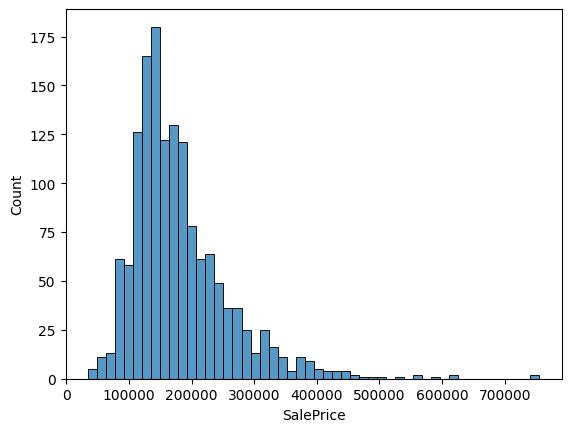

In [9]:
sns.histplot(data=train, x='SalePrice', bins=50)

<Axes: xlabel='SalePrice', ylabel='Count'>

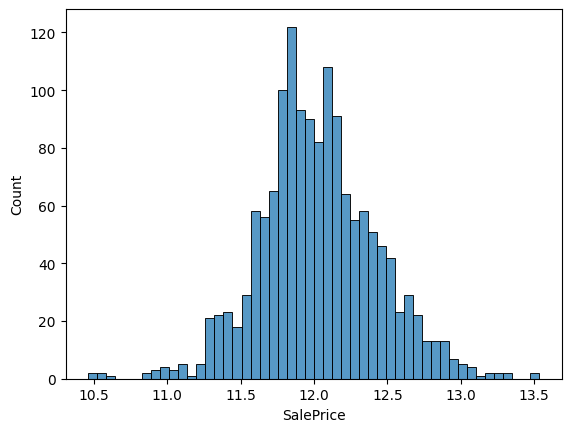

In [10]:
sns.histplot(data=np.log(train['SalePrice']), bins=50)

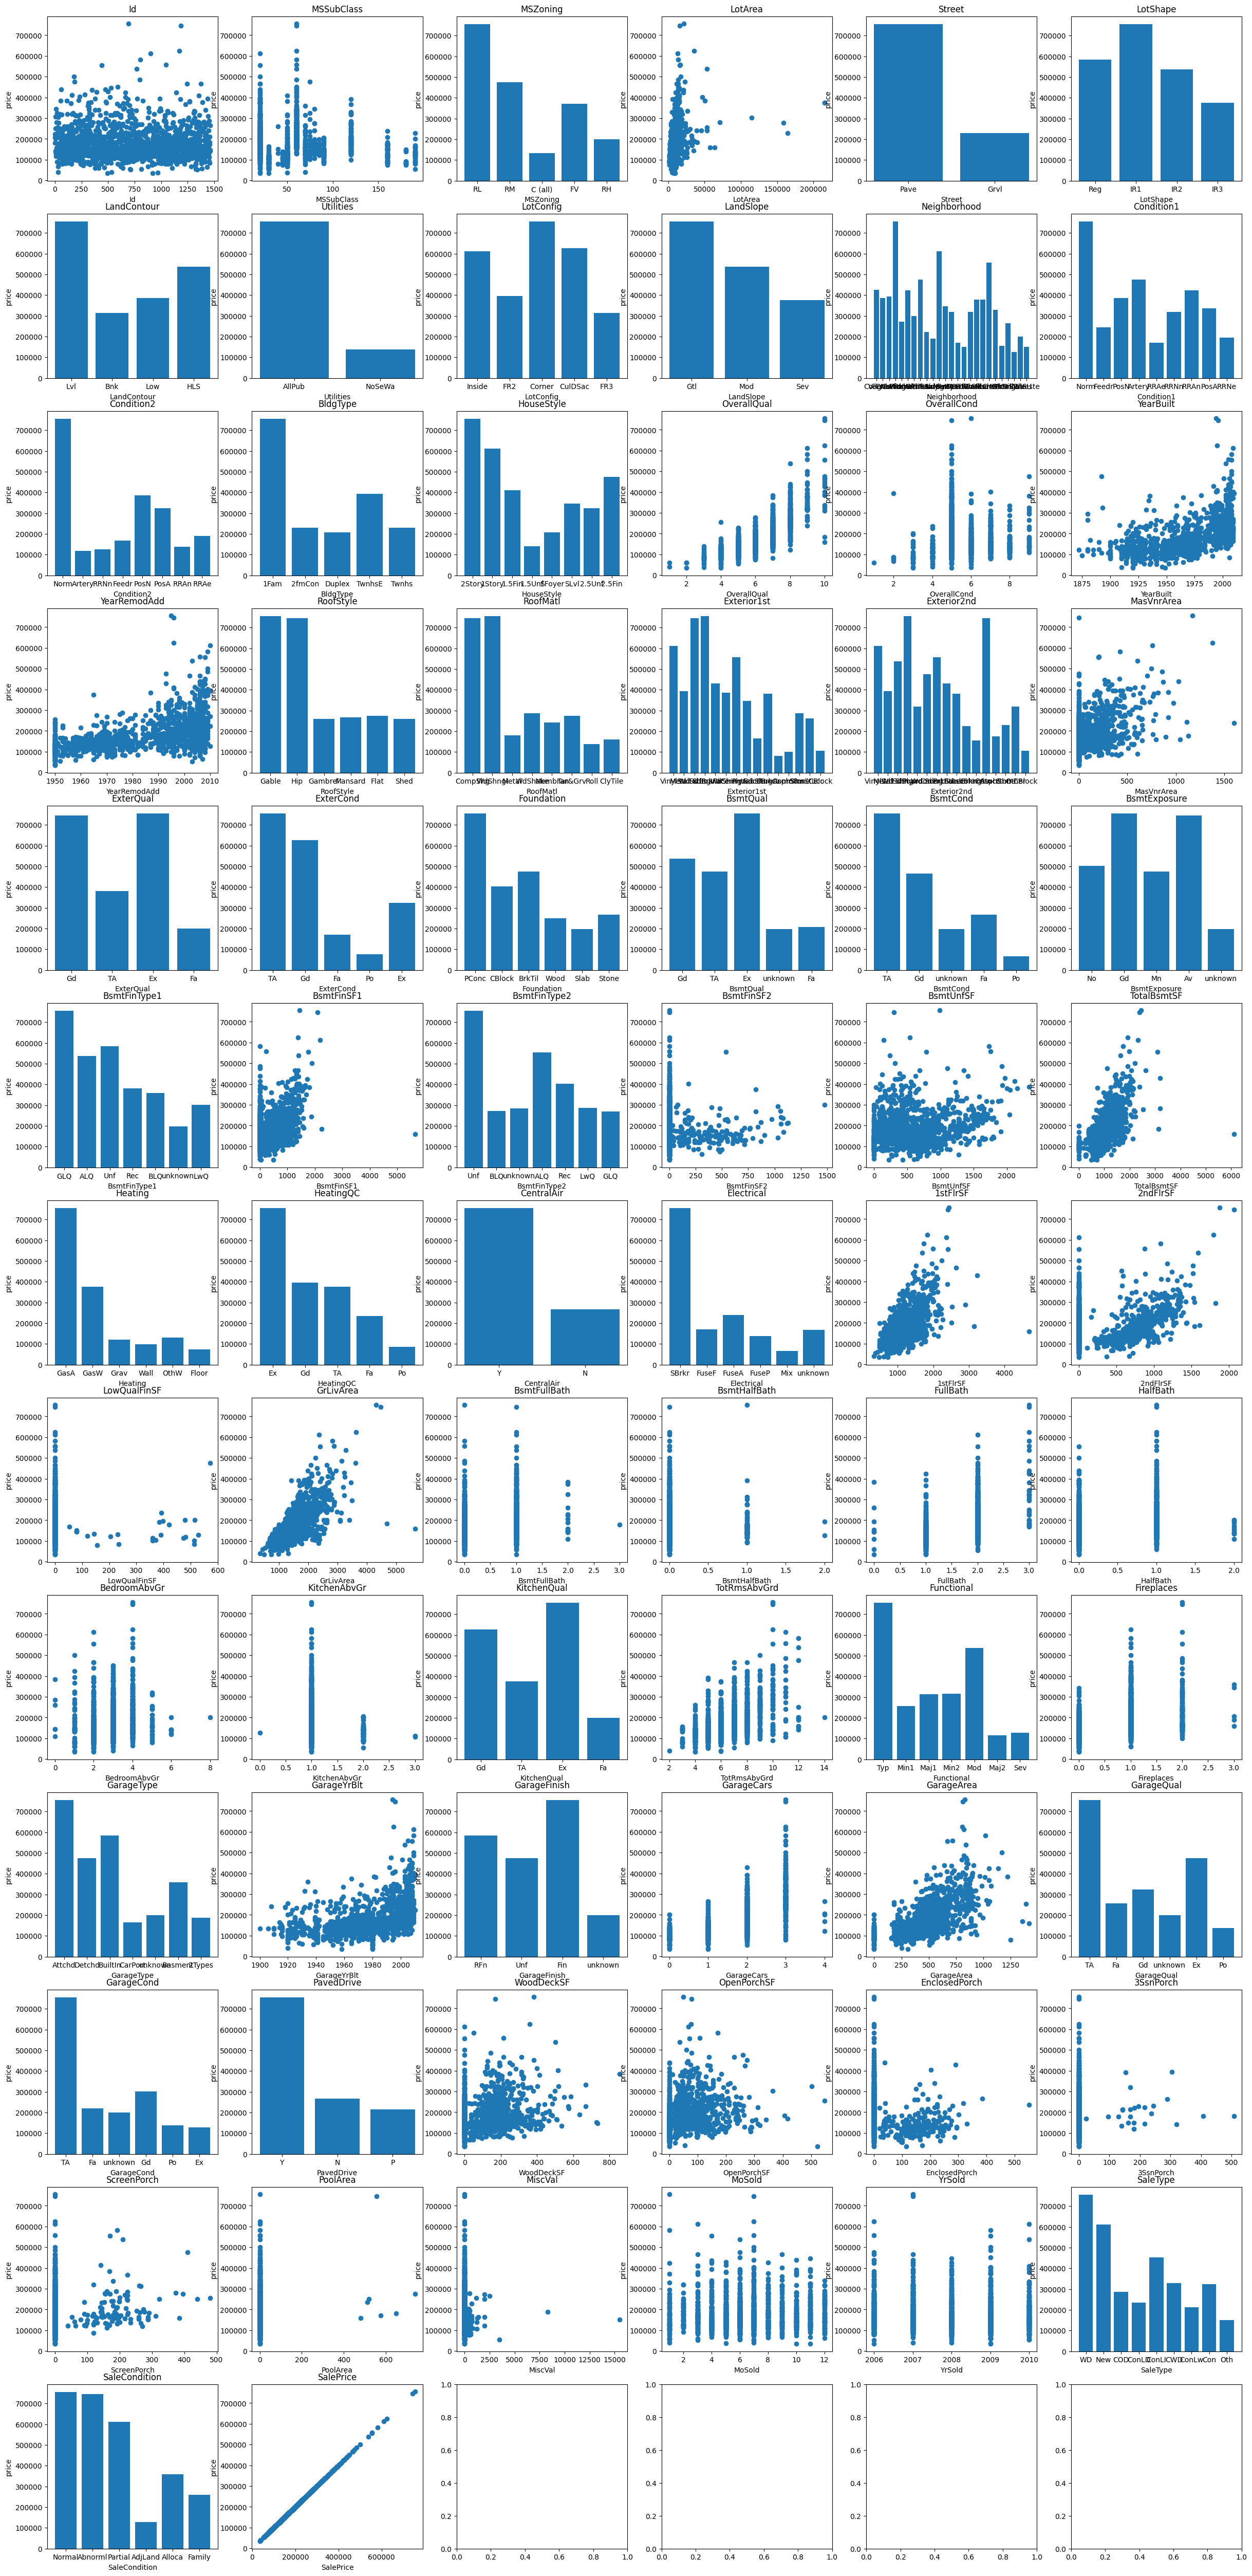

In [11]:
fig, axs = plt.subplots(figsize=(30, 64), ncols=6, nrows=13)
for i, col in enumerate(train.columns):
    if pd.api.types.is_numeric_dtype(train[col]):
        axs[i//6, i%6].scatter(train[col], train['SalePrice'])
        axs[i//6, i%6].set_title(col)
        axs[i//6, i%6].set_ylabel("price")
        axs[i//6, i%6].set_xlabel(col)
    else:
        axs[i//6, i%6].bar(train[col], train['SalePrice'])
        axs[i//6, i%6].set_title(col)
        axs[i//6, i%6].set_ylabel("price")
        axs[i//6, i%6].set_xlabel(col)

In [12]:
# train = train[train.LotArea < train.LotArea.quantile(0.99)]
# train = train[train.MiscVal < train.MiscVal.quantile(0.99)]

In [13]:
drop_cols = ['Id', 'ScreenPorch', 'MiscVal', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea']
to_object = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'TotRmsAbvGrd']

train.drop(columns=drop_cols, inplace=True)
train[to_object] = train[to_object].astype(np.object_)

test.drop(columns=drop_cols, inplace=True)
test[to_object] = test[to_object].astype(np.object_)




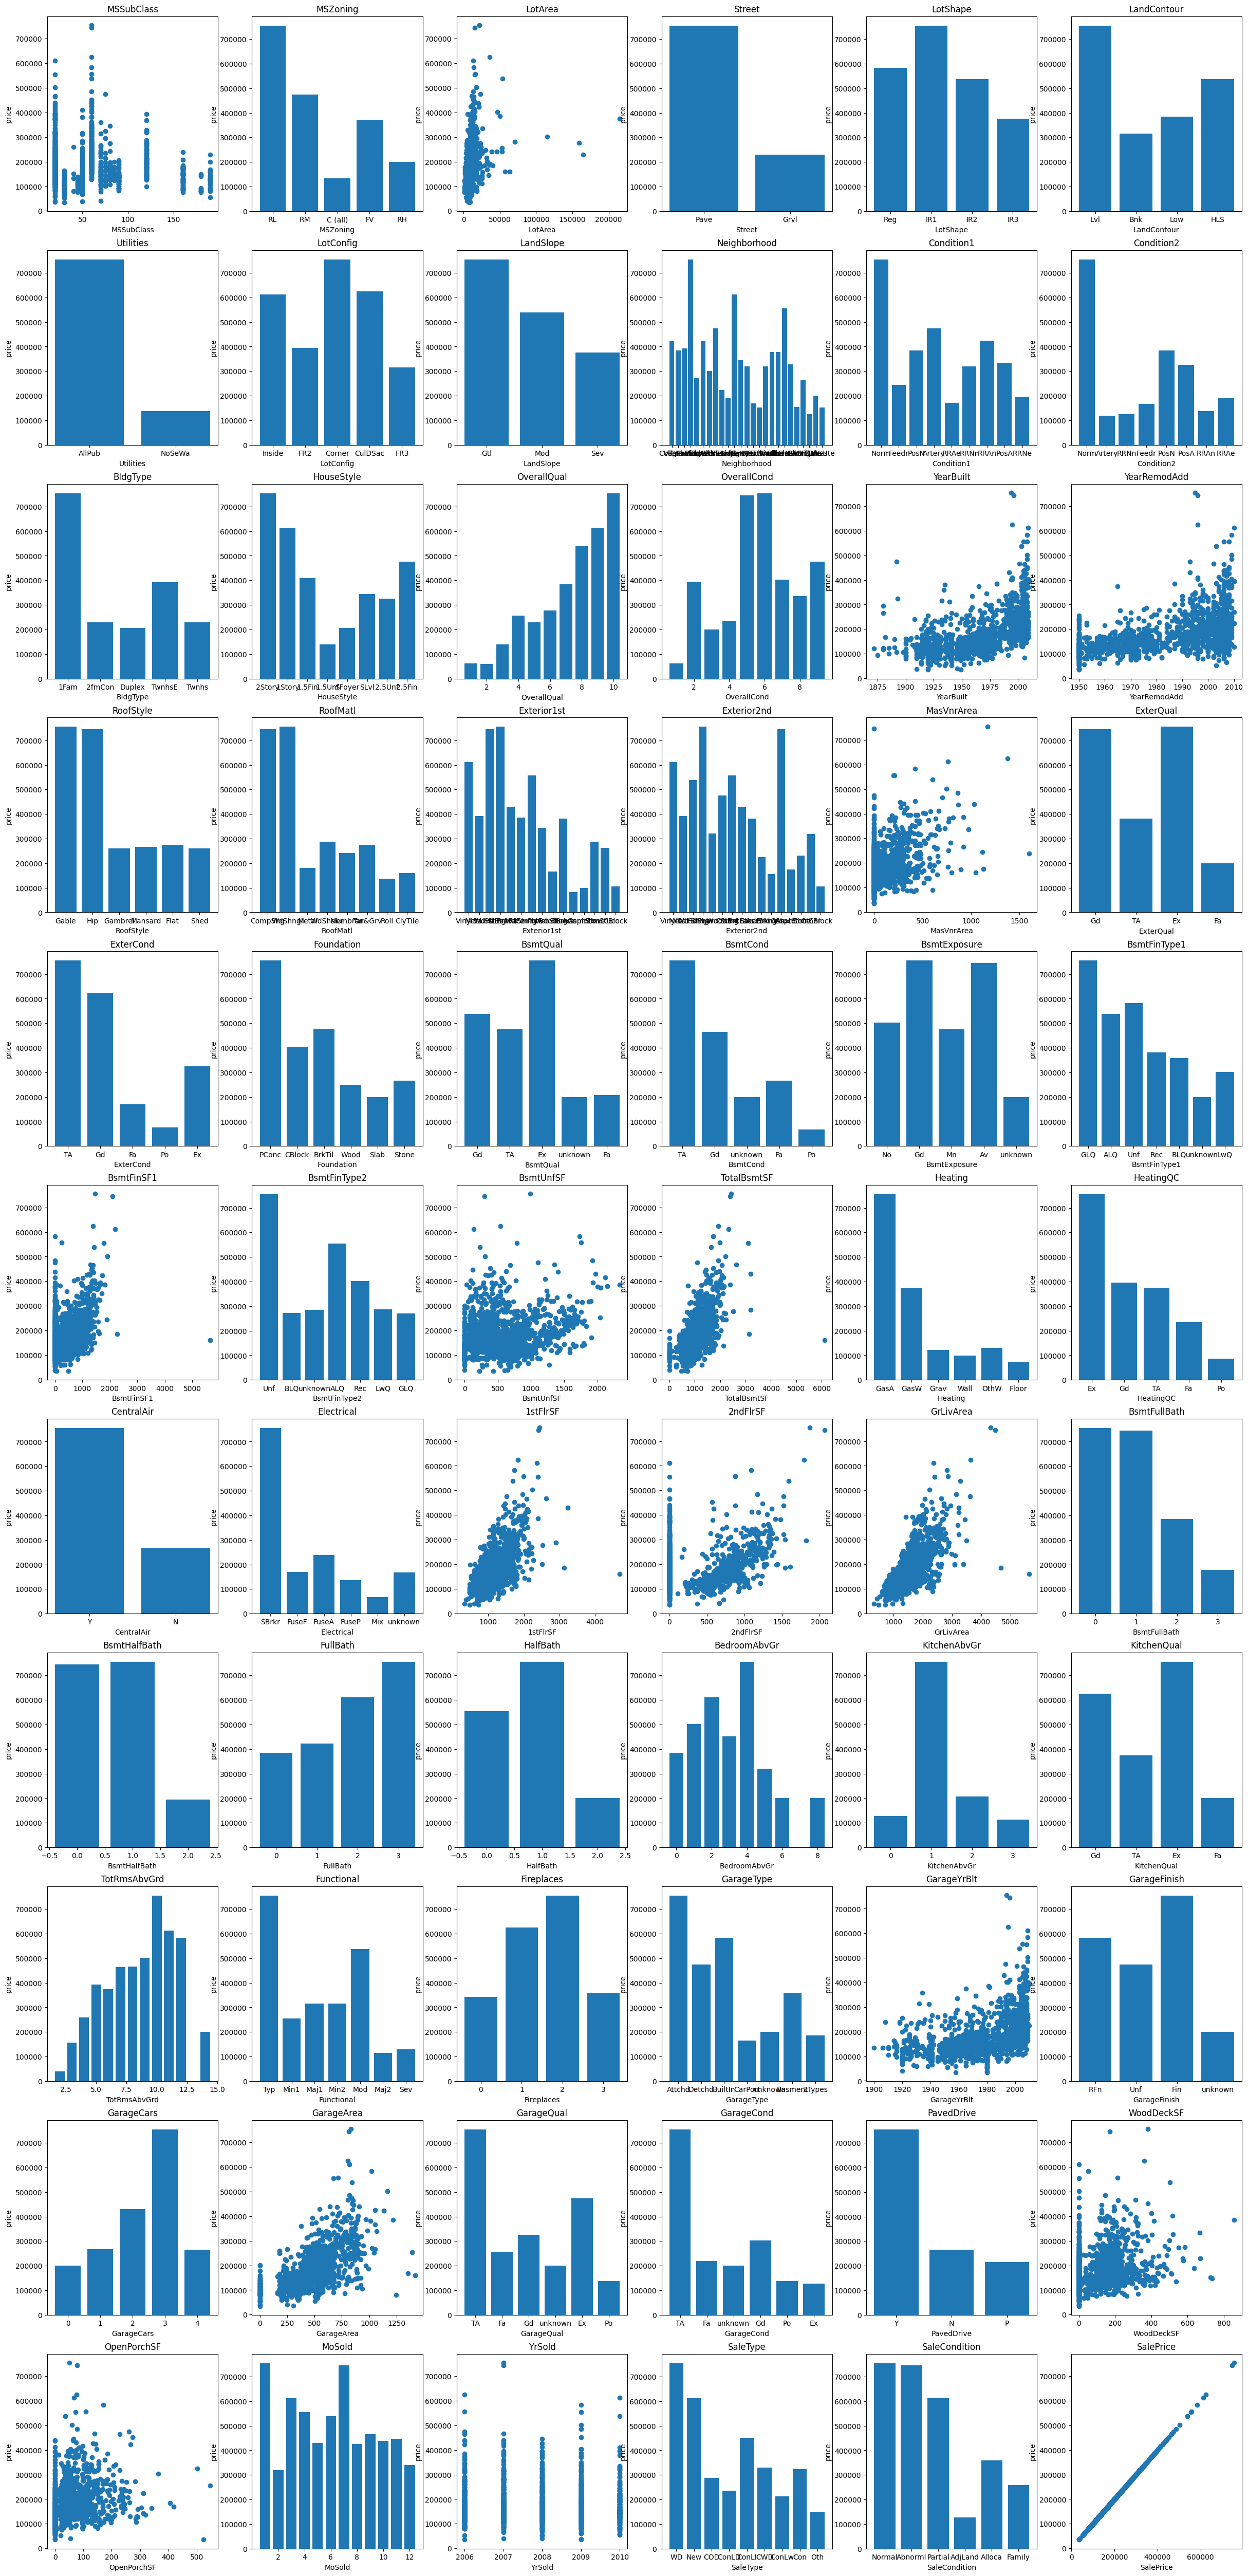

In [14]:
fig, axs = plt.subplots(figsize=(30, 64), ncols=6, nrows=11)
for i, col in enumerate(train.columns):
    if pd.api.types.is_numeric_dtype(train[col]):
        axs[i//6, i%6].scatter(train[col], train['SalePrice'])
        axs[i//6, i%6].set_title(col)
        axs[i//6, i%6].set_ylabel("price")
        axs[i//6, i%6].set_xlabel(col)
    else:
        axs[i//6, i%6].bar(train[col], train['SalePrice'])
        axs[i//6, i%6].set_title(col)
        axs[i//6, i%6].set_ylabel("price")
        axs[i//6, i%6].set_xlabel(col)

In [15]:
train['house_age'] = train.YrSold - train.YearBuilt
test['house_age'] = test.YrSold - test.YearBuilt

train.drop(columns=['YrSold', 'YearBuilt'], inplace=True)
test.drop(columns=['YrSold', 'YearBuilt'], inplace=True)

In [16]:
train['house_and_basement_area'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']
train.drop(columns=['TotalBsmtSF', '2ndFlrSF', '1stFlrSF'], inplace=True)

test['house_and_basement_area'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['TotalBsmtSF']
test.drop(columns=['TotalBsmtSF', '2ndFlrSF', '1stFlrSF'], inplace=True)

In [17]:
train['SalePrice'] = np.log(train.SalePrice)
test['SalePrice'] = np.log(test.SalePrice)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MSSubClass               1460 non-null   int64  
 1   MSZoning                 1460 non-null   object 
 2   LotArea                  1460 non-null   int64  
 3   Street                   1460 non-null   object 
 4   LotShape                 1460 non-null   object 
 5   LandContour              1460 non-null   object 
 6   Utilities                1460 non-null   object 
 7   LotConfig                1460 non-null   object 
 8   LandSlope                1460 non-null   object 
 9   Neighborhood             1460 non-null   object 
 10  Condition1               1460 non-null   object 
 11  Condition2               1460 non-null   object 
 12  BldgType                 1460 non-null   object 
 13  HouseStyle               1460 non-null   object 
 14  OverallQual             

,MSSubClass,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,house_age,house_and_basement_area
MSSubClass,1.000000,-0.139781,0.040581,0.023573,-0.069836,-0.140759,0.074853,0.081396,-0.098672,-0.012579,-0.006100,-0.073959,-0.028746,-0.082225
LotArea,-0.139781,1.000000,0.013788,0.103321,0.214103,-0.002618,0.263116,-0.025865,0.180403,0.171698,0.084774,0.257320,-0.014832,0.307234
YearRemodAdd,0.040581,0.013788,1.000000,0.176529,0.128451,0.181133,0.287389,0.616444,0.371600,0.205726,0.226298,0.565608,-0.590360,0.342873
MasVnrArea,0.023573,0.103321,0.176529,1.000000,0.261256,0.113862,0.388052,0.244444,0.370884,0.159991,0.122528,0.426775,-0.311479,0.444454
BsmtFinSF1,-0.069836,0.214103,0.128451,0.261256,1.000000,-0.495251,0.208171,0.148782,0.296970,0.204306,0.111761,0.372023,-0.248483,0.415843
BsmtUnfSF,-0.140759,-0.002618,0.181133,0.113862,-0.495251,1.000000,0.240257,0.185610,0.183303,-0.005316,0.129005,0.221985,-0.150619,0.373733
GrLivArea,0.074853,0.263116,0.287389,0.388052,0.208171,0.240257,1.000000,0.219801,0.468997,0.247433,0.330224,0.700927,-0.200302,0.874373
GarageYrBlt,0.081396,-0.025865,0.616444,0.244444,0.148782,0.185610,0.219801,1.000000,0.468804,0.219093,0.217921,0.495794,-0.776004,0.307343
GarageArea,-0.098672,0.180403,0.371600,0.370884,0.296970,0.183303,0.468997,0.468804,1.000000,0.224666,0.241435,0.650888,-0.479408,0.563747
WoodDeckSF,-0.012579,0.171698,0.205726,0.159991,0.204306,-0.005316,0.247433,0.219093,0.224666,1.000000,0.058661,0.334135,-0.223551,0.283610


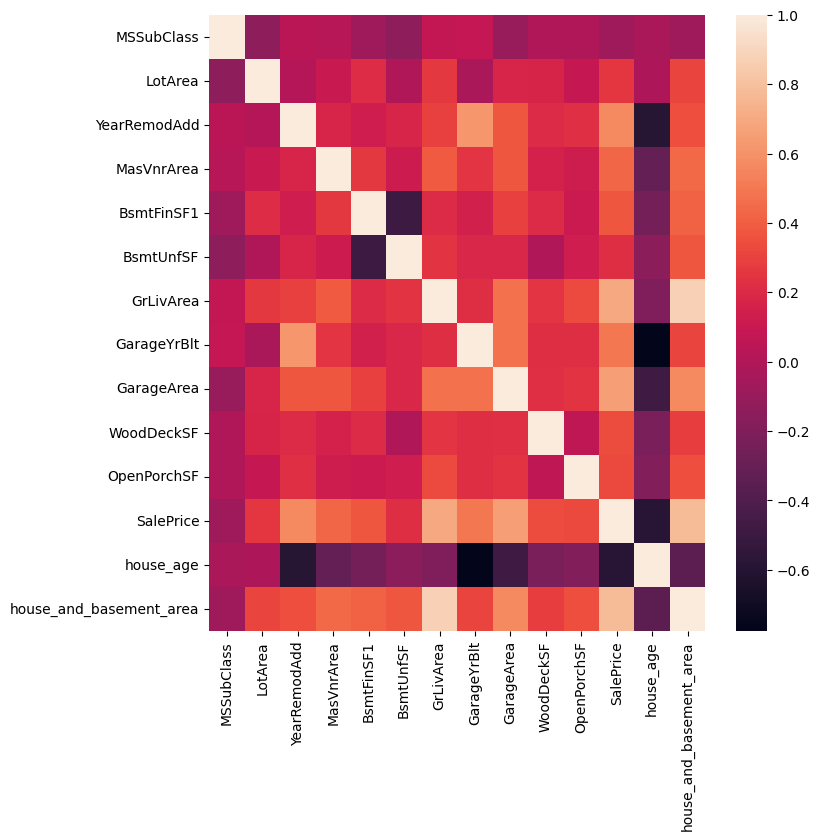

In [19]:
fig = plt.figure(figsize=(8, 8))
hm = train.select_dtypes(include=np.number).corr()
sns.heatmap(hm)
hm

In [20]:
test.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,house_age,house_and_basement_area
147,60,RL,9505,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,VinylSd,180.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,884,GasA,Ex,Y,SBrkr,2035,0,0,2,1,3,1,Gd,8,Typ,1,BuiltIn,2001.0,Fin,2,434,TA,TA,Y,144,48,5,WD,Normal,12.312682,9,2919
676,70,RM,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,2,1950,Gable,CompShg,AsbShng,Stucco,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,1095,GasW,Fa,N,SBrkr,1774,1,0,2,0,4,2,TA,8,Min2,0,2Types,1920.0,Unf,3,779,Fa,Fa,N,0,0,5,WD,Normal,11.373663,106,2869
1304,160,RM,3363,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,2Story,7,5,2004,Gable,CompShg,VinylSd,VinylSd,117.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,976,GasA,Ex,Y,SBrkr,1708,0,0,2,0,3,1,Gd,7,Maj1,0,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,4,WD,Normal,11.775290,2,2684
1372,60,RL,9750,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,6,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,975,Unf,133,GasA,Ex,Y,SBrkr,2097,1,0,2,1,3,1,Gd,8,Typ,1,Detchd,1998.0,RFn,2,583,TA,TA,Y,253,170,6,WD,Normal,12.521978,8,3205
1427,50,RL,10930,Pave,Reg,Bnk,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,6,1950,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,No,BLQ,580,Unf,333,GasA,TA,Y,FuseA,1558,1,0,1,1,3,1,TA,6,Typ,1,Attchd,1962.0,Unf,1,288,TA,TA,Y,0,0,4,WD,Normal,11.849398,63,2471


In [21]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,house_age,house_and_basement_area
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,GasA,Ex,Y,SBrkr,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,2,WD,Normal,12.247694,5,2566
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,GasA,Ex,Y,SBrkr,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,5,WD,Normal,12.109011,31,2524
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,GasA,Ex,Y,SBrkr,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,9,WD,Normal,12.317167,7,2706
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,GasA,Gd,Y,SBrkr,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,2,WD,Abnorml,11.849398,91,2473
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,GasA,Ex,Y,SBrkr,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,12,WD,Normal,12.429216,8,3343


In [22]:
X_train = train.drop(columns='SalePrice')
y_train = train['SalePrice']
X_test = test.drop(columns='SalePrice')
y_test = test['SalePrice']

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=123)

In [24]:
categorical_columns = X_train.select_dtypes(include=np.object_).columns
numeric_columns = X_train.select_dtypes(include=np.number).columns

ohe_cols = [list(X_train.columns).index(col) for col in categorical_columns 
            if X_train[col].nunique()<5]

mte_cols = [list(X_train.columns).index(col) for col in categorical_columns 
            if X_train[col].nunique()>=5]

numeric_columns = [list(X_train.columns).index(col) for col in numeric_columns]


mte_pipeline = Pipeline([
    ('mte', TargetEncoder()),
    ('robust_scaler', RobustScaler())
])

ct = ColumnTransformer([
    ('mte', mte_pipeline, mte_cols),
    ('ohe', OneHotEncoder(), ohe_cols),
    ('robust_scaler', RobustScaler(), numeric_columns)
])



In [25]:
alphas = np.linspace(0.01, 10, 50)

lasso_pipe = Pipeline([
    ('columnt_transformer', ct),
    ('lasso', Lasso())
])

searcher = GridSearchCV(lasso_pipe, param_grid={'lasso__alpha': alphas}, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5)
searcher.fit(X_train, y_train)
searcher.best_params_

lasso_pipe = lasso_pipe.set_params(**searcher.best_params_)
lasso_pipe.fit(X_train, y_train);

In [26]:
alphas = np.linspace(0.01, 10, 50)

ridge_pipe = Pipeline([
    ('columnt_transformer', ct),
    ('ridge', Ridge())
])


searcher = GridSearchCV(ridge_pipe, param_grid=[{'ridge__alpha': alphas}], scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)
searcher.fit(X_train, y_train)

ridge_pipe.set_params(**searcher.best_params_)
ridge_params = searcher.best_params_
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('columnt_transformer',
                 ColumnTransformer(transformers=[('mte',
                                                  Pipeline(steps=[('mte',
                                                                   TargetEncoder()),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  [1, 7, 9, 10, 11, 12, 13, 14,
                                                   15, 17, 18, 19, 20, 23, 24,
                                                   25, 26, 27, 28, 30, 32, 33,
                                                   35, 41, 44, 45, 47, 50, 52,
                                                   53, ...]),
                                                 ('ohe', OneHotEncoder(),
                                                  [3, 4, 5, 6, 8, 22, 34, 37,
                                                   38, 39, 40, 42, 43, 46, 49,
                                                   54]),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  [0, 2, 16, 21, 29, 31, 36, 48,
                                                   51, 55, 56, 60, 61])])),
                ('ridge', Ridge(alpha=np.float64(10.0)))])

In [27]:
neighbors = range(5, 21, 3)

kneighbors_pipe = Pipeline([
    ('columnt_transformer', ct),
    ('kneighbors', KNeighborsRegressor())
])

searcher = GridSearchCV(kneighbors_pipe, param_grid=[{'kneighbors__n_neighbors': neighbors}], scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)
searcher.fit(X_train, y_train)

kneighbors_pipe.set_params(**searcher.best_params_)
kneighbors_params = searcher.best_params_
kneighbors_pipe.fit(X_train, y_train)

Pipeline(steps=[('columnt_transformer',
                 ColumnTransformer(transformers=[('mte',
                                                  Pipeline(steps=[('mte',
                                                                   TargetEncoder()),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  [1, 7, 9, 10, 11, 12, 13, 14,
                                                   15, 17, 18, 19, 20, 23, 24,
                                                   25, 26, 27, 28, 30, 32, 33,
                                                   35, 41, 44, 45, 47, 50, 52,
                                                   53, ...]),
                                                 ('ohe', OneHotEncoder(),
                                                  [3, 4, 5, 6, 8, 22, 34, 37,
                                                   38, 39, 40, 42, 43, 46, 49,
                                                   54]),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  [0, 2, 16, 21, 29, 31, 36, 48,
                                                   51, 55, 56, 60, 61])])),
                ('kneighbors', KNeighborsRegressor())])

In [28]:
param_grid = {
    "decision_tree__max_depth": list(range(3, 22, 3)),
    "decision_tree__min_samples_split": list(range(5, 31, 5)),
    "decision_tree__min_impurity_decrease": [0, 0.1, 0.2, 0.3],
    "decision_tree__max_leaf_nodes": list(range(5, 41, 10)) + [None]
}

decision_tree_pipe = Pipeline([
    ('columnt_transformer', ct),
    ('decision_tree', DecisionTreeRegressor())
])


searcher = GridSearchCV(decision_tree_pipe, param_grid=param_grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)
searcher.fit(X_train, y_train)

decision_tree_pipe.set_params(**searcher.best_params_)
tree_params = searcher.best_params_
decision_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columnt_transformer',
                 ColumnTransformer(transformers=[('mte',
                                                  Pipeline(steps=[('mte',
                                                                   TargetEncoder()),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  [1, 7, 9, 10, 11, 12, 13, 14,
                                                   15, 17, 18, 19, 20, 23, 24,
                                                   25, 26, 27, 28, 30, 32, 33,
                                                   35, 41, 44, 45, 47, 50, 52,
                                                   53, ...]),
                                                 ('ohe', OneHotEncoder(),
                                                  [3, 4, 5, 6, 8, 22, 34, 37,
                                                   38, 39, 40, 42, 43, 46, 49,
                                                   54]),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  [0, 2, 16, 21, 29, 31, 36, 48,
                                                   51, 55, 56, 60, 61])])),
                ('decision_tree',
                 DecisionTreeRegressor(max_depth=9, min_impurity_decrease=0,
                                       min_samples_split=25))])

In [29]:
pipe_rm = Pipeline([
    ('columnt_transformer', ct),
    ('ridge', Ridge(alpha=np.float64(6.737959183673469)))
])

pipe_knn = Pipeline([
    ('columnt_transformer', ct),
    ('kneighbors', KNeighborsRegressor(n_neighbors=11))
])

pipe_dt = Pipeline([
    ('columnt_transformer', ct),
    ('decision_tree', DecisionTreeRegressor(max_depth=9, min_impurity_decrease=0, min_samples_split=25))
])

estimators = [
    ('ridge', pipe_rm),
    ('knn', pipe_knn),
    ('tree', pipe_dt)
]

final_estimator = DecisionTreeRegressor(max_depth=4)

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=5)
stacking_regressor.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('ridge',
                               Pipeline(steps=[('columnt_transformer',
                                                ColumnTransformer(transformers=[('mte',
                                                                                 Pipeline(steps=[('mte',
                                                                                                  TargetEncoder()),
                                                                                                 ('robust_scaler',
                                                                                                  RobustScaler())]),
                                                                                 [1,
                                                                                  7,
                                                                                  9,
                                                                                  10,
                                                                                  11,
                                                                                  12,
                                                                                  13,
                                                                                  14,
                                                                                  15,
                                                                                  17,
                                                                                  18,
                                                                                  19,
                                                                                  20,
                                                                                  23,
                                                                                  24,
                                                                                  25,
                                                                                  26,
                                                                                  27,
                                                                                  28,
                                                                                  30,
                                                                                  32,
                                                                                  33,
                                                                                  35,
                                                                                  41,
                                                                                  44,
                                                                                  45,
                                                                                  47,
                                                                                  50,
                                                                                  52,
                                                                                  53, ...]),
                                                                                ('ohe',
                                                                                 OneHotEncoder(),
                                                                                 [3,
                                                                                  4,
                                                                                  5,
                                                                                  6,
                                                                                  8,
                                                                                  22,
                                           

In [30]:
base_pipe = Pipeline([
    ('columnt_transformer', ct),
    ('decision_tree', DecisionTreeRegressor(max_depth=9, min_impurity_decrease=0, min_samples_split=25))
])

# bagging = BaggingRegressor(estimator=base_pipe, n_estimators=8)
# bagging.fit(X_train, y_train)

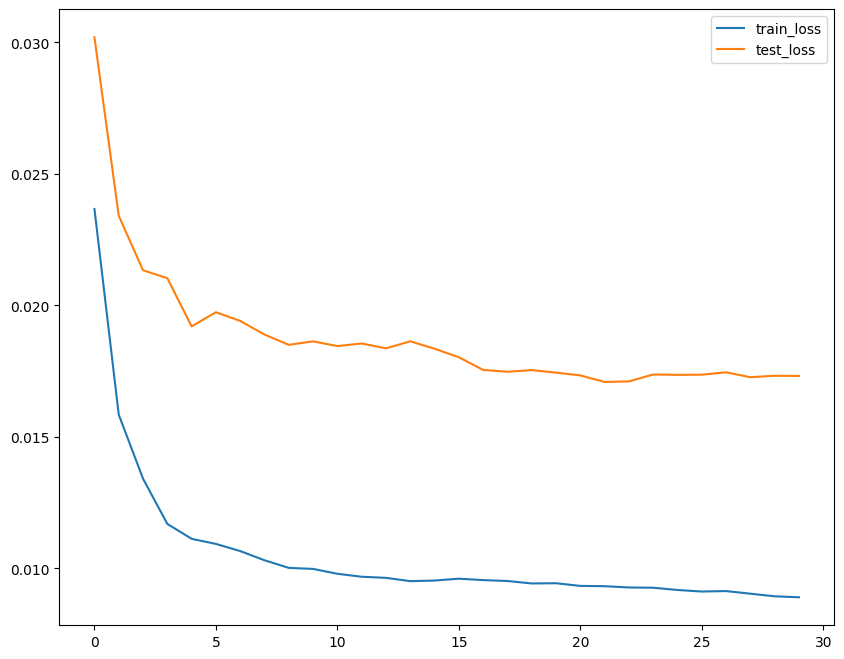

In [31]:
train_losses = []
test_losses = []

for i in range(1, 31):
    
    bagging = BaggingRegressor(estimator=base_pipe, n_estimators=i, random_state=123)
    bagging.fit(X_train, y_train)
    
    train_preds = bagging.predict(X_train)
    val_preds = bagging.predict(X_val)

    train_error = np.mean((train_preds - y_train)**2)
    val_error = np.mean((val_preds - y_val)**2)

    train_losses.append(train_error)
    test_losses.append(val_error)

fig = plt.figure(figsize=(10, 8))

plt.plot(train_losses)
plt.plot(test_losses)

plt.legend(['train_loss', 'test_loss'])
plt.show()

In [38]:
bagging = BaggingRegressor(estimator=base_pipe, n_estimators=20, random_state=123)
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=Pipeline(steps=[('columnt_transformer',
                                            ColumnTransformer(transformers=[('mte',
                                                                             Pipeline(steps=[('mte',
                                                                                              TargetEncoder()),
                                                                                             ('robust_scaler',
                                                                                              RobustScaler())]),
                                                                             [1,
                                                                              7,
                                                                              9,
                                                                              10,
                                                                              11,
                                                                              12,
                                                                              13,
                                                                              14,
                                                                              15,
                                                                              17,
                                                                              18,
                                                                              19,
                                                                              20,
                                                                              23,
                                                                              24,
                                                                              25,
                                                                              26,
                                                                              27,
                                                                              28,
                                                                              30,
                                                                              32,
                                                                              33,
                                                                              35,
                                                                              41,
                                                                              44,
                                                                              45,
                                                                              47,
                                                                              50,
                                                                              52,
                                                                              53, ...]),
                                                                            ('ohe',
                                                                             OneHotEncoder(),
                                                                             [3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              8,
                                                                              22,
                                                                              34,
                                                                              37,
                                                                              38,
                                     

In [39]:
random_forest_pipeline = Pipeline([
    ('columnt_transformer', ct),
    ('random_forest', RandomForestRegressor(n_estimators=99//3, min_samples_leaf=3, random_state=123))
])
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columnt_transformer',
                 ColumnTransformer(transformers=[('mte',
                                                  Pipeline(steps=[('mte',
                                                                   TargetEncoder()),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  [1, 7, 9, 10, 11, 12, 13, 14,
                                                   15, 17, 18, 19, 20, 23, 24,
                                                   25, 26, 27, 28, 30, 32, 33,
                                                   35, 41, 44, 45, 47, 50, 52,
                                                   53, ...]),
                                                 ('ohe', OneHotEncoder(),
                                                  [3, 4, 5, 6, 8, 22, 34, 37,
                                                   38, 39, 40, 42, 43, 46, 49,
                                                   54]),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  [0, 2, 16, 21, 29, 31, 36, 48,
                                                   51, 55, 56, 60, 61])])),
                ('random_forest',
                 RandomForestRegressor(min_samples_leaf=3, n_estimators=33,
                                       random_state=123))])

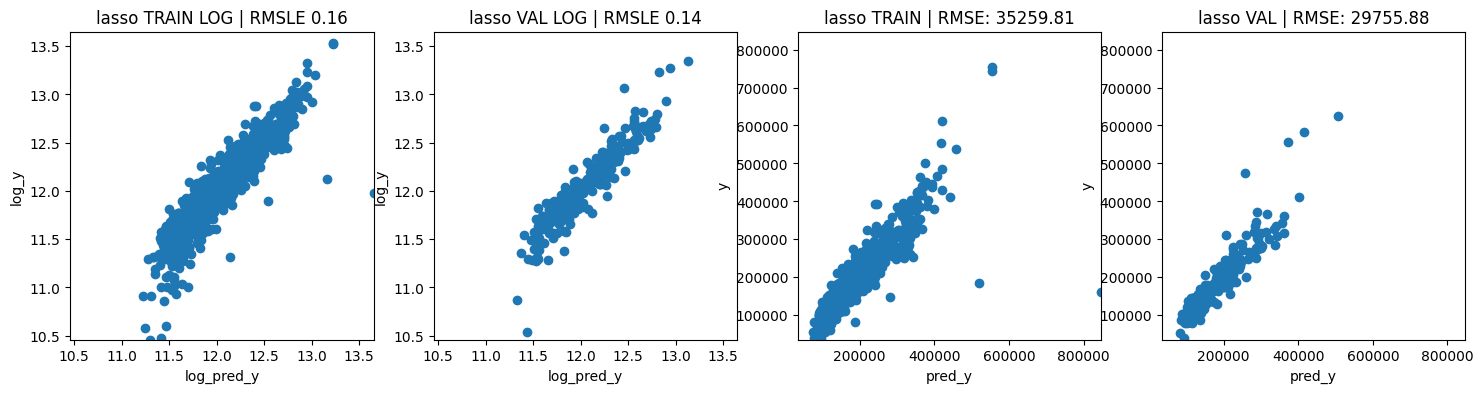

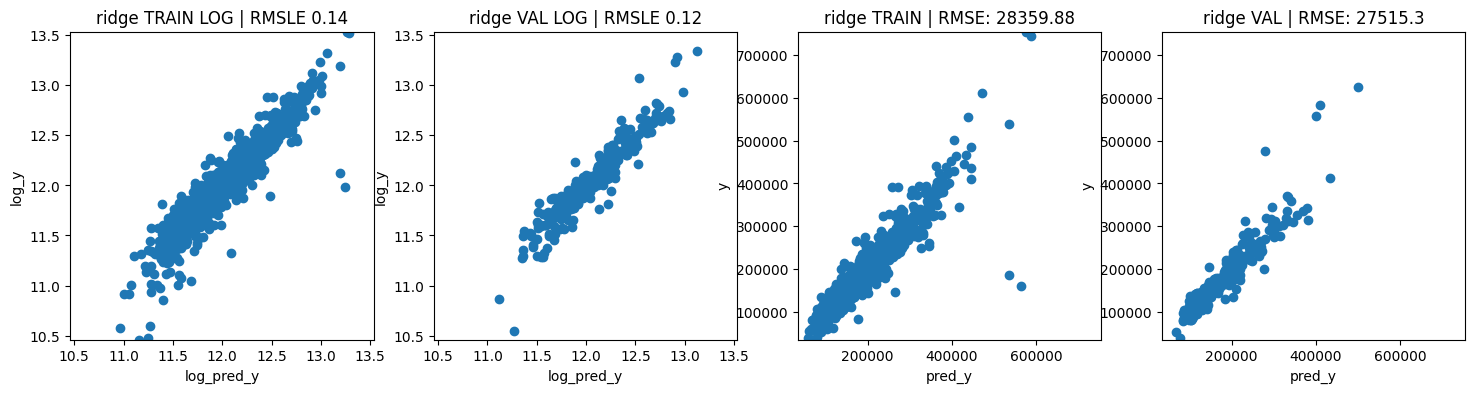

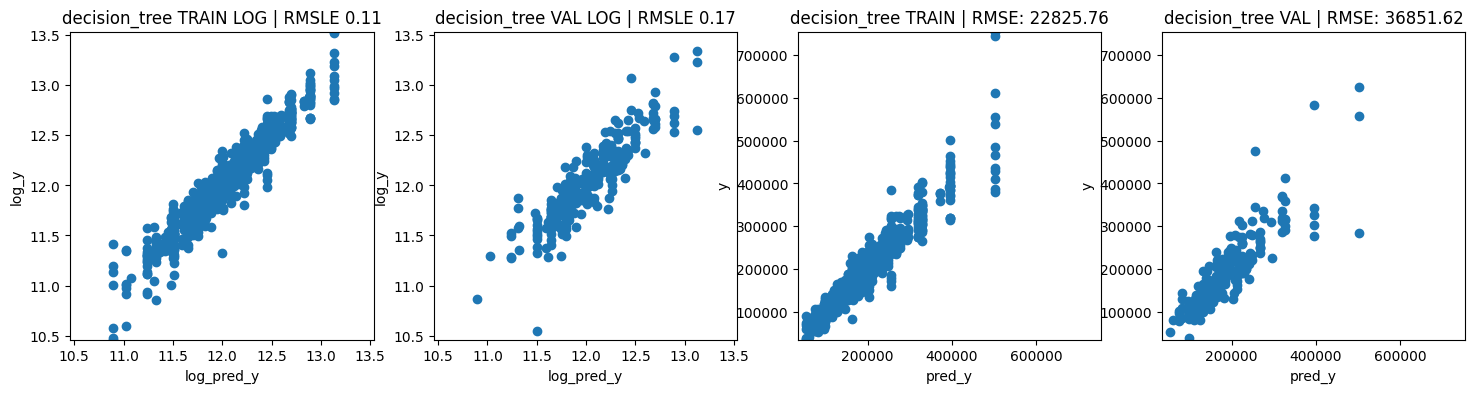

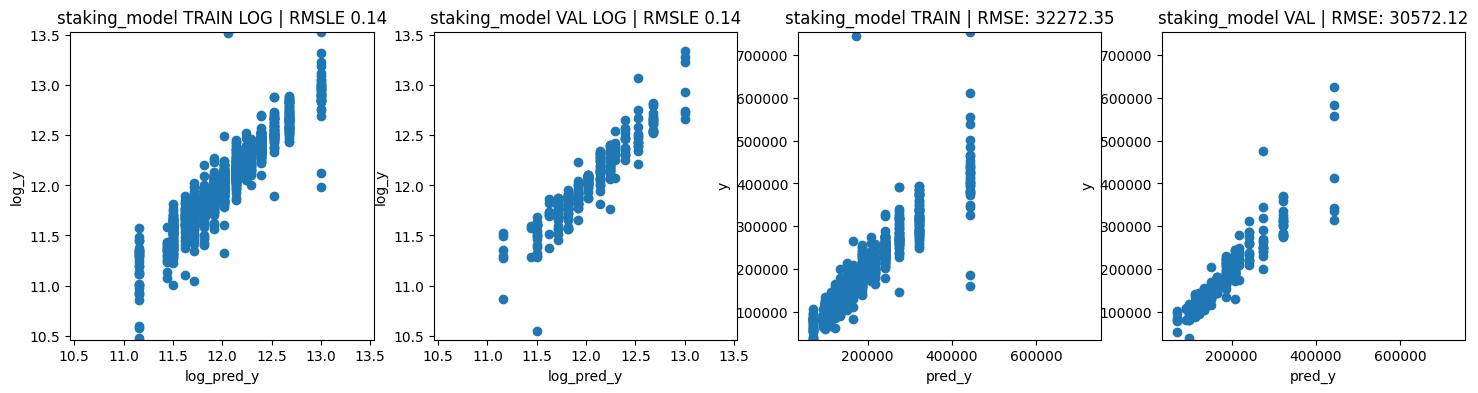

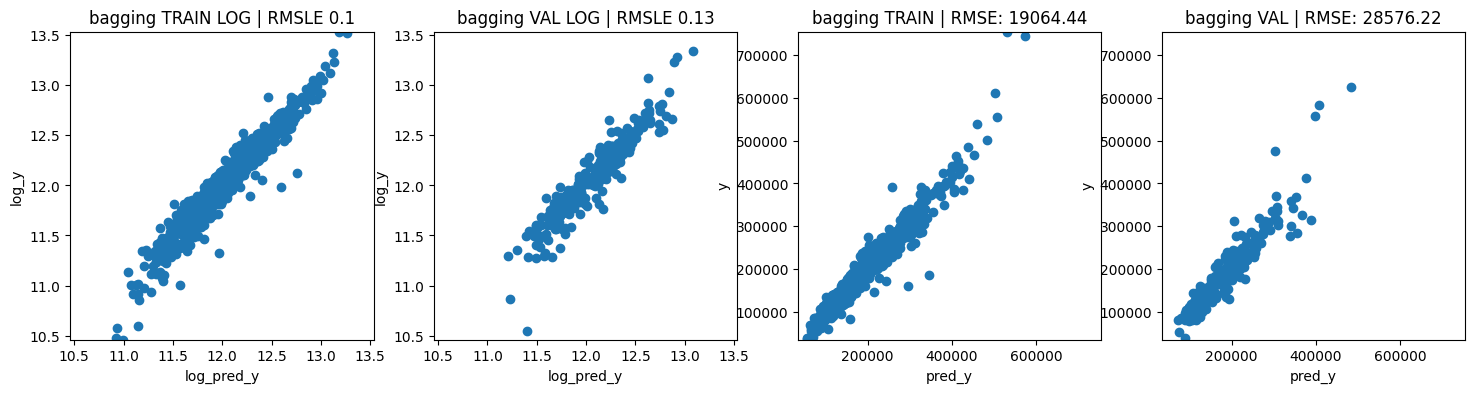

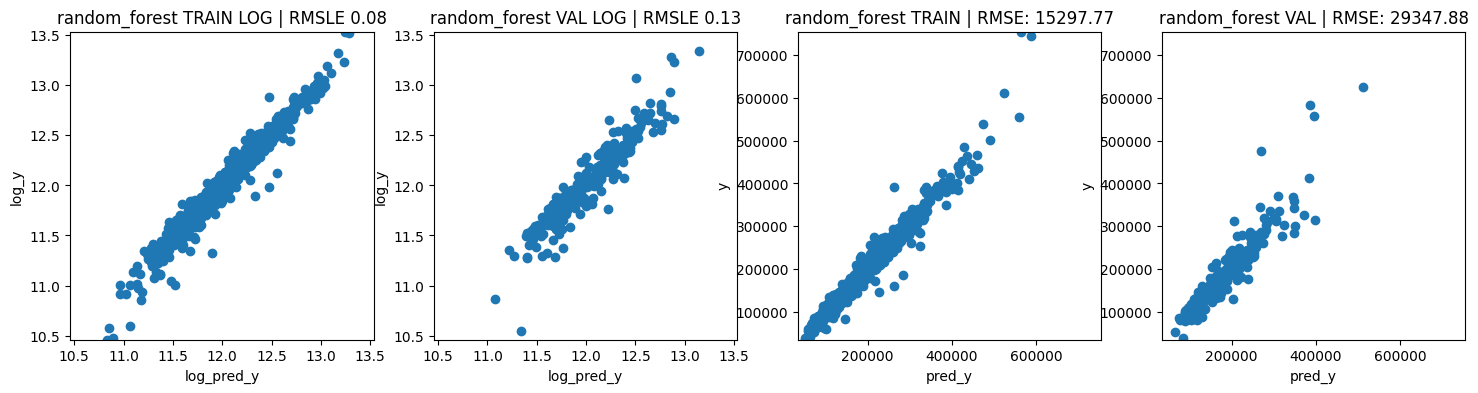

In [40]:
models = {'lasso': lasso_pipe, 
          'ridge': ridge_pipe, 
          'decision_tree': decision_tree_pipe, 
          'staking_model': stacking_regressor, 
          'bagging': bagging, 
          'random_forest': random_forest_pipeline}

for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    max_value = np.max([y_pred_train.max(), y_train.max(), y_pred_val.max(), y_val.max()])
    min_value = np.min([y_pred_train.min(), y_train.min(), y_pred_val.min(), y_val.min()])

    train_rmsle = root_mean_squared_error(y_train, y_pred_train)
    val_rmsle = root_mean_squared_error(y_val, y_pred_val)

    train_rmse = root_mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
    val_rmse = root_mean_squared_error(np.exp(y_val), np.exp(y_pred_val))

    fig, axs = plt.subplots(figsize=(18, 4), ncols=4)

    axs[0].scatter(y_pred_train, y_train)
    axs[0].set_title(name + f' TRAIN LOG | RMSLE {round(train_rmsle, 2)}')
    axs[0].set_ylabel("log_y")
    axs[0].set_xlabel("log_pred_y")
    axs[0].set_xlim(min_value, max_value)
    axs[0].set_ylim(min_value, max_value)

    axs[1].scatter(y_pred_val, y_val)
    axs[1].set_title(name + f' VAL LOG | RMSLE {round(val_rmsle, 2)}')
    axs[1].set_ylabel("log_y")
    axs[1].set_xlabel("log_pred_y")
    axs[1].set_xlim(min_value, max_value)
    axs[1].set_ylim(min_value, max_value)

    axs[2].scatter(np.exp(y_pred_train), np.exp(y_train))
    axs[2].set_title(name + f' TRAIN | RMSE: {round(train_rmse, 2)}')
    axs[2].set_ylabel("y")
    axs[2].set_xlabel("pred_y")
    axs[2].set_xlim(np.exp(min_value), np.exp(max_value))
    axs[2].set_ylim(np.exp(min_value), np.exp(max_value))

    axs[3].scatter(np.exp(y_pred_val), np.exp(y_val))
    axs[3].set_title(name + f' VAL | RMSE: {round(val_rmse, 2)}')
    axs[3].set_ylabel("y")
    axs[3].set_xlabel("pred_y")
    axs[3].set_xlim(np.exp(min_value), np.exp(max_value))
    axs[3].set_ylim(np.exp(min_value), np.exp(max_value))

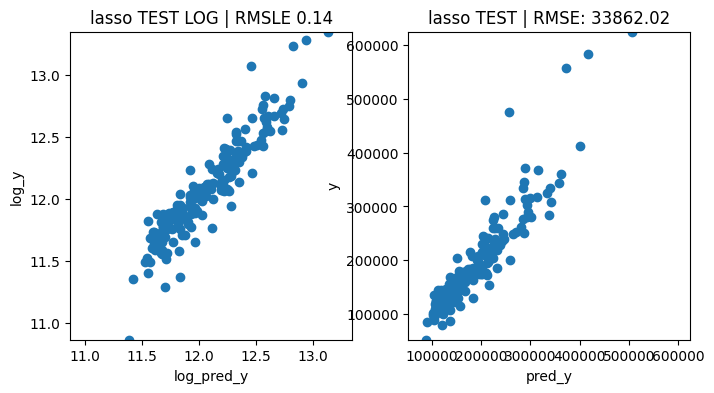

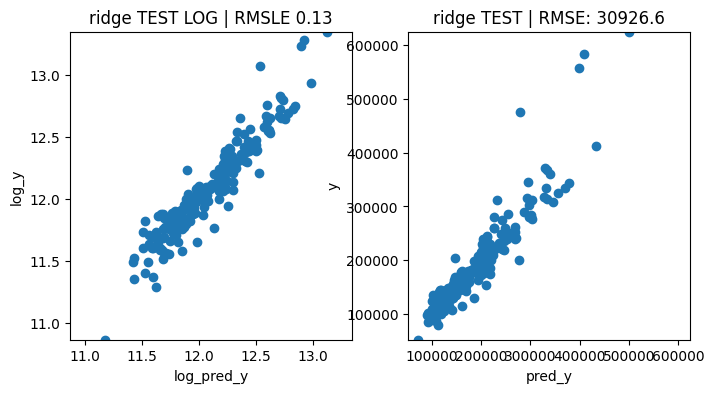

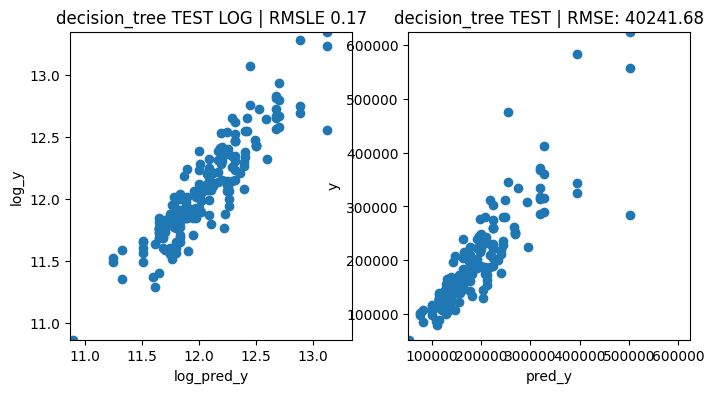

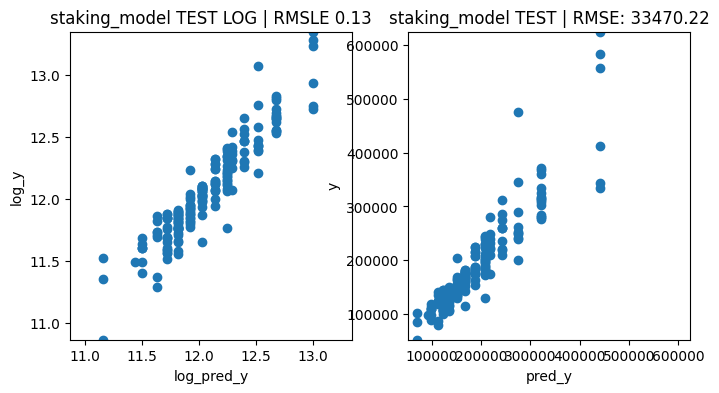

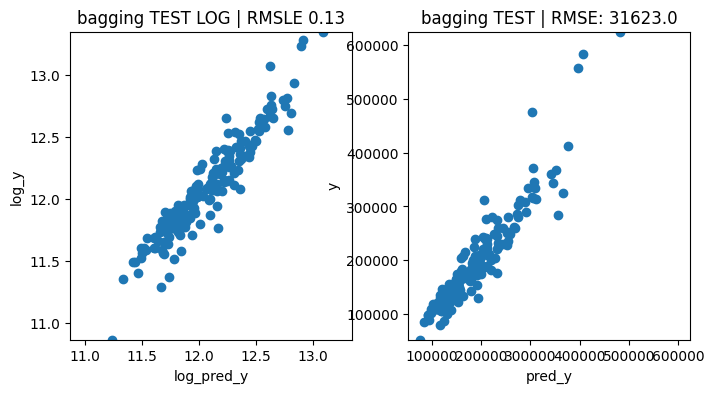

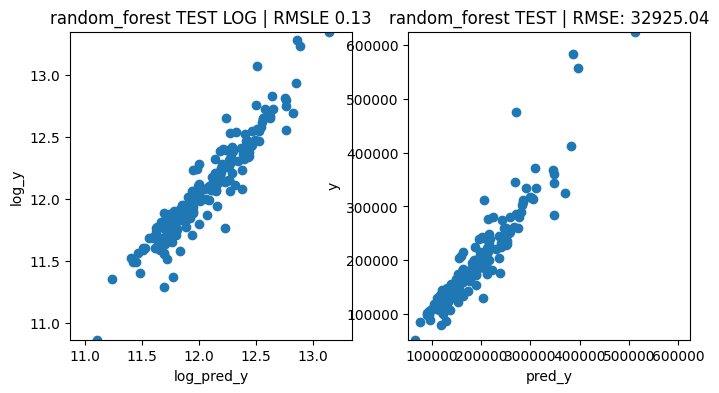

In [41]:
for name, model in models.items():
    y_pred_test = model.predict(X_test)
    max_value = np.max([y_pred_test.max(), y_test.max()])
    min_value = np.min([y_pred_test.min(), y_test.min()])

    test_rmsle = root_mean_squared_error(y_test, y_pred_test)
    test_rmse = root_mean_squared_error(np.exp(y_test), np.exp(y_pred_test))

    fig, axs = plt.subplots(figsize=(8, 4), ncols=2)

    axs[0].scatter(y_pred_test, y_test)
    axs[0].set_title(name + f' TEST LOG | RMSLE {round(test_rmsle, 2)}')
    axs[0].set_ylabel("log_y")
    axs[0].set_xlabel("log_pred_y")
    axs[0].set_xlim(min_value, max_value)
    axs[0].set_ylim(min_value, max_value)

    axs[1].scatter(np.exp(y_pred_test), np.exp(y_test))
    axs[1].set_title(name + f' TEST | RMSE: {round(test_rmse, 2)}')
    axs[1].set_ylabel("y")
    axs[1].set_xlabel("pred_y")
    axs[1].set_xlim(np.exp(min_value), np.exp(max_value))
    axs[1].set_ylim(np.exp(min_value), np.exp(max_value))